<a href="https://colab.research.google.com/github/Shubhanker01/ai-course/blob/main/fetch_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
# import pandas and requests
import pandas as pd
import requests
import os
import json
import ast
import matplotlib.pyplot as plt


In [11]:
# get users and posts and create directory-> insert csv file
users = requests.get('https://jsonplaceholder.typicode.com/users').json()
posts = requests.get('https://jsonplaceholder.typicode.com/posts').json()

posts_df = pd.DataFrame(posts)
users_df = pd.DataFrame(users)
merged_df = pd.merge(posts_df, users_df, left_on='userId', right_on='id')

os.makedirs('datasets', exist_ok=True)
merged_df.to_csv('datasets/merged_data.csv', index=False)



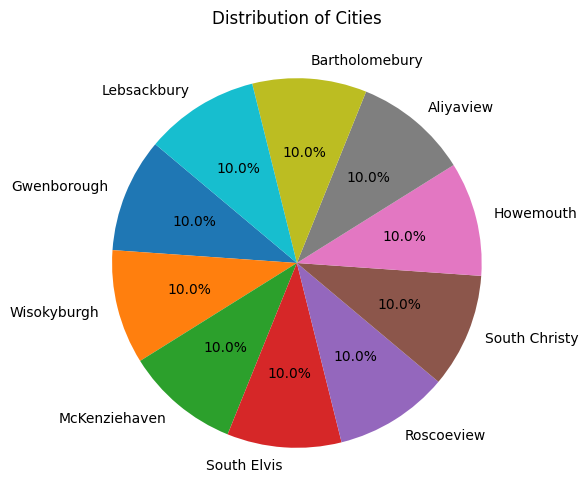

In [20]:
# now read the dataset
df = pd.read_csv('datasets/merged_data.csv')
# city counts
df['city'] = df['address'].apply(lambda x: ast.literal_eval(x)['city'])

city_counts = df['city'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(city_counts, labels=city_counts.index, autopct='%1.1f%%',startangle=140)
plt.title('Distribution of Cities')
plt.show()
